In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
# 한글 문제
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [3]:
df = pd.read_csv('./data/조건에 맞는 맛집 추출(김승규).csv')

In [131]:
b = pd.read_csv('./data/income2021.csv')
b

,Unnamed: 0,1,2,3,4,5,6,7,8,9,10
0,송파구,3,10,28,55,81,58,68,69,55,93
1,용산구,3,7,56,91,87,67,57,28,28,56
2,성동구,3,28,40,91,101,78,74,73,59,108
3,동대문구,9,7,42,68,93,112,112,83,63,116
4,영등포구,9,13,56,151,136,107,113,56,36,103
5,도봉구,12,20,50,126,135,122,124,77,53,71
6,중랑구,8,16,48,150,152,133,155,77,31,70
7,양천구,16,23,44,123,140,144,138,73,44,105
8,성북구,15,13,52,91,136,106,92,98,38,99
9,금천구,19,27,105,111,112,138,83,37,31,57


In [4]:
Fin_data = pd.read_csv('./data/맛집찾아조통합본3.csv')
Fin_data

,Unnamed: 0,식당명,별점,구,주소,음식종류,가격대,리뷰날짜,리뷰평가,리뷰수,맛있다수,괜찮다수,별로다수
0,0,이코이,4.4,도봉구,서울특별시 도봉구 도봉로112길 20,일식,만원-2만원,2022-05-29,맛있다,37,32.0,4.0,1.0
1,1,코노하카레,4.2,도봉구,서울특별시 도봉구 우이천로20길 7 103동상가 1F,일식,만원-2만원,2022-02-07,맛있다,38,32.0,6.0,0.0
2,2,하이쿠,4.1,도봉구,서울특별시 도봉구 도봉로114길 40 1F,일식,만원-2만원,2022-04-13,별로,37,28.0,6.0,3.0
3,3,마쯔무라돈까스,4.1,도봉구,서울특별시 도봉구 노해로63길 84 B1,일식,만원 미만,2022-07-12,맛있다,86,73.0,11.0,2.0
4,4,수정궁,4.1,도봉구,서울특별시 도봉구 방학로 173,중식,만원 미만,2022-03-30,맛있다,24,16.0,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,1698,여신족발,4.3,금천구,서울특별시 금천구 벚꽃로38길 21,한식,만원-2만원,2022-04-29,맛있다,34,30.0,3.0,1.0
1296,1699,김사부샤브샤브 무한리필,4.2,금천구,서울특별시 금천구 가산로 132,중식,만원-2만원,2022-04-03,별로,27,22.0,3.0,2.0
1297,1898,월래순교자관,4.3,구로구,서울특별시 구로구 디지털로19길 12,중식,만원-2만원,2022-08-11,맛있다,59,37.0,17.0,5.0
1298,1899,낭만부대찌개,4.2,구로구,서울특별시 구로구 디지털로 288 대륭포스트타워 B1 104호,한식,만원 미만,2022-04-11,맛있다,28,23.0,4.0,1.0


# 도시별 맛집 수

<AxesSubplot:title={'center':'도시별 맛집 수'}, xlabel='count', ylabel='구'>

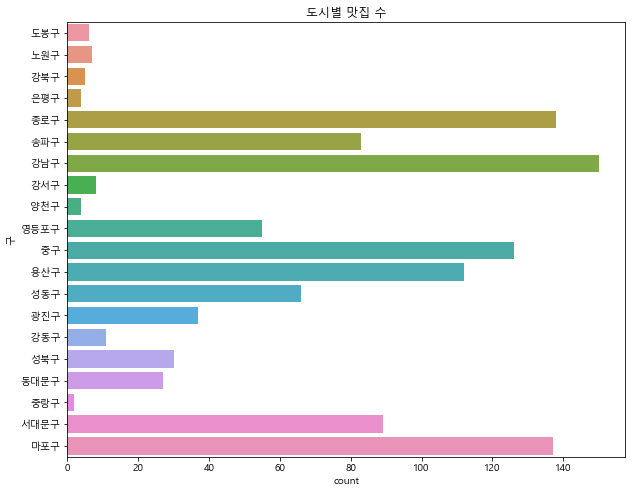

In [23]:
plt.figure(figsize=(10,8))
plt.title('도시별 맛집 수')
plt.xlabel('맛집수')
plt.ylabel('도시')
sns.countplot(y="구", data=df)

# 음식 종류에 따른 서울시 맛집 Bar plot

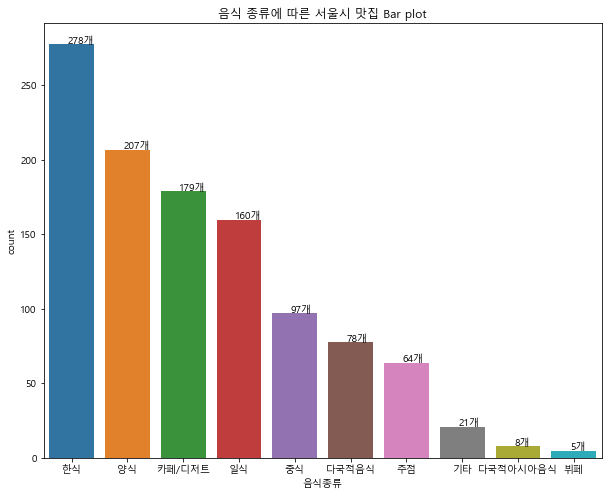

In [7]:
ordered_index = df.value_counts('음식종류').index
plt.figure(figsize=(10, 8))
ax1 = sns.countplot(x='음식종류', data=df, order=ordered_index)

plt.title('음식 종류에 따른 서울시 맛집 Bar plot')
plt.xlabel('음식종류')

    
for p in ax1.patches:
    ax1.annotate('{:.0f}개'.format(p.get_height()), (p.get_x() + 0.33, p.get_height() + 0.5))

# 음식 가격대에 따른 서울시 맛집 Bar plot

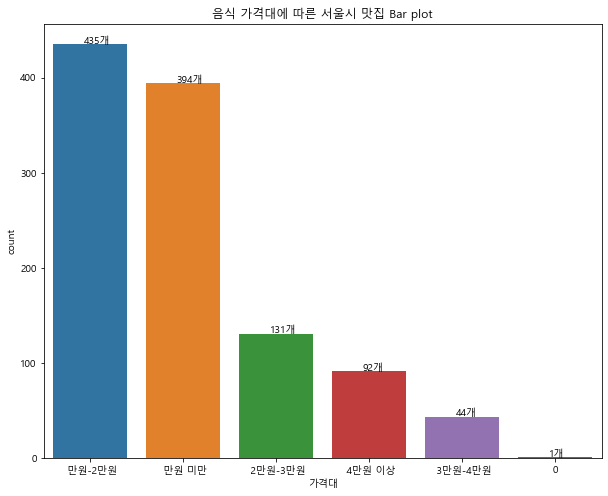

In [9]:
ordered_index = df.value_counts('가격대').index
plt.figure(figsize=(10, 8))
ax1 = sns.countplot(x='가격대', data=df, order=ordered_index)

plt.title('음식 가격대에 따른 서울시 맛집 Bar plot')
plt.xlabel('가격대')

    
for p in ax1.patches:
    ax1.annotate('{:.0f}개'.format(p.get_height()), (p.get_x() + 0.33, p.get_height() + 0.5))

# 구별 인구수와 맛집 수 시각화

In [5]:
pop_data = pd.read_csv('./data/인구수(2010-2021).csv')
pop_data

,Unnamed: 0,구,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,0,종로구,179362,177419,173148,167867,165344,163822,161922,164257,163026,161869,158996,153789
1,1,중구,141200,141567,140807,137990,136227,134329,134409,134593,135633,136488,134635,131787
2,2,용산구,257143,259288,255294,251925,249914,247909,245102,244444,245090,245185,244645,237285
3,3,성동구,316892,308767,306868,306571,303891,305065,307161,312711,316463,308979,300505,292672
4,4,광진구,388775,386673,384269,381439,377375,375180,372104,372298,371063,366972,360109,352627
5,5,동대문구,379343,378534,375683,376445,376319,373824,370312,366011,364338,363023,357014,352006
6,6,중랑구,432302,428672,423655,421237,423411,418620,415677,412780,408147,402024,399562,391885
7,7,성북구,497692,494422,490639,485347,475961,469560,461617,455407,447687,454744,447056,440142
8,8,강북구,350007,348740,346493,341921,338410,334426,330704,328002,322915,317695,311569,302563
9,9,도봉구,370734,367949,364454,360609,355712,353241,350272,346234,341649,335631,327361,319373


In [7]:
pop_2022 = pd.read_csv('./data/2022인구수.csv')
pop_2022

,Unnamed: 0,구,총 인구수,남자 인구수,여자 인구수
0,1,종로구,"140,389","67,928","72,461"
1,2,중구,"119,402","57,975","61,427"
2,3,용산구,"216,005","103,947","112,058"
3,4,성동구,"280,295","136,351","143,944"
4,5,광진구,"336,339","162,081","174,258"
5,6,동대문구,"333,759","164,366","169,393"
6,7,중랑구,"384,950","189,325","195,625"
7,8,성북구,"429,175","206,542","222,633"
8,9,강북구,"293,211","142,404","150,807"
9,10,도봉구,"311,833","151,470","160,363"


In [38]:
# pop_2022.dtypes
# pop_2022['총 인구수'] = pop_2022['총 인구수'].replace(',','')
# pop_2022
li = []
for i in range(0,25) :
    a = pop_2022['여자 인구수'][i].replace(',','')
    li.append(a)
li

pop_2022['여자 인구수'] = li
pop_2022

,Unnamed: 0,총 인구수,남자 인구수,여자 인구수
구,,,,
종로구,1,140389,67928,72461
중구,2,119402,57975,61427
용산구,3,216005,103947,112058
성동구,4,280295,136351,143944
광진구,5,336339,162081,174258
동대문구,6,333759,164366,169393
중랑구,7,384950,189325,195625
성북구,8,429175,206542,222633
강북구,9,293211,142404,150807


In [43]:
pop_2022 = pop_2022.astype('int')   

In [46]:
pop_num = pop_2022['총 인구수']
pop_num

구
종로구     140389
중구      119402
용산구     216005
성동구     280295
광진구     336339
동대문구    333759
중랑구     384950
성북구     429175
강북구     293211
도봉구     311833
노원구     503798
은평구     468176
서대문구    301728
마포구     362552
양천구     440549
강서구     568286
구로구     391812
금천구     229414
영등포구    372472
동작구     381787
관악구     482450
서초구     401084
강남구     522874
송파구     656576
강동구     457466
Name: 총 인구수, dtype: int32

In [9]:
Fin_data.head()

,Unnamed: 0,식당명,별점,구,주소,음식종류,가격대,리뷰날짜,리뷰평가,리뷰수,맛있다수,괜찮다수,별로다수
0,0,이코이,4.4,도봉구,서울특별시 도봉구 도봉로112길 20,일식,만원-2만원,2022-05-29,맛있다,37,32.0,4.0,1.0
1,1,코노하카레,4.2,도봉구,서울특별시 도봉구 우이천로20길 7 103동상가 1F,일식,만원-2만원,2022-02-07,맛있다,38,32.0,6.0,0.0
2,2,하이쿠,4.1,도봉구,서울특별시 도봉구 도봉로114길 40 1F,일식,만원-2만원,2022-04-13,별로,37,28.0,6.0,3.0
3,3,마쯔무라돈까스,4.1,도봉구,서울특별시 도봉구 노해로63길 84 B1,일식,만원 미만,2022-07-12,맛있다,86,73.0,11.0,2.0
4,4,수정궁,4.1,도봉구,서울특별시 도봉구 방학로 173,중식,만원 미만,2022-03-30,맛있다,24,16.0,5.0,3.0


In [10]:
num = Fin_data['구'].value_counts()
num

강남구     150
종로구     138
마포구     137
 중구     126
서초구     119
 용산구    112
서대문구     89
송파구      83
 성동구     66
영등포구     55
관악구      48
 광진구     37
동작구      31
성북구      30
동대문구     27
 강동구     11
강서구       8
노원구       7
도봉구       6
강북구       5
양천구       4
은평구       4
구로구       3
중랑구       2
금천구       2
Name: 구, dtype: int64

<BarContainer object of 25 artists>

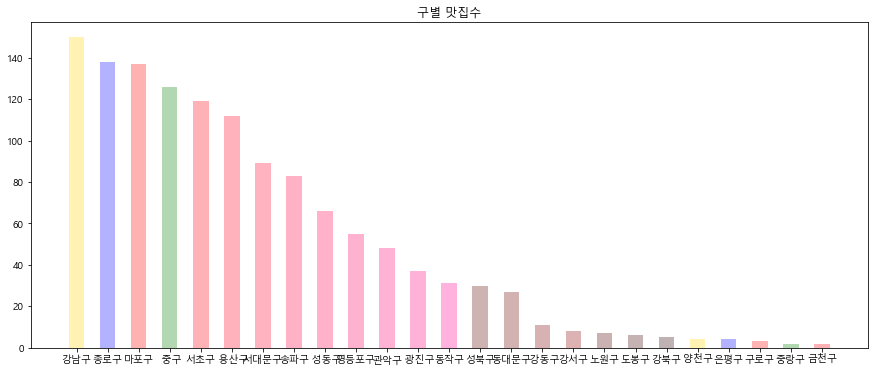

In [11]:
y=num.values
x=num.index

xlabel=num.index
plt.figure(figsize=(15,6))
plt.title('구별 맛집수')
# x=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19] #xticks 시 위치 표시에 사용할 변수
plt.bar(x,y, width=0.5, color = ['gold', 'b', '#FF0000', 'green','#FF0010','#FF0020','#FF0030',\
                                 '#FF0040','#FF0050','#FF0060','#FF0070','#FF0080','#FF0090',\
                                 '#600000','#700000','#800000','#900000','#500000','#400000','#300000'], alpha = 0.3)

In [49]:
test = pd.DataFrame(pop_num)
test

,총 인구수
구,
종로구,140389
중구,119402
용산구,216005
성동구,280295
광진구,336339
동대문구,333759
중랑구,384950
성북구,429175
강북구,293211


In [65]:
test1 = pd.DataFrame(num )
test1
# test1.index_name = '구'
test2 = test1.rename(columns={'구': '구별맛집수'})
test2['구'] = test2.index
test2.set_index('구',inplace=True)
test2

,구별맛집수
구,
강남구,150
종로구,138
마포구,137
중구,126
서초구,119
용산구,112
서대문구,89
송파구,83
성동구,66


In [85]:
test.dtypes

총 인구수    int32
dtype: object

In [93]:
# test2 = test2.sort_index()
# test2
test = test.astype('float')  
test.dtypes

총 인구수    float64
dtype: object

In [105]:
li = []
for i in range(0,25) :
    a = test2.index[i].replace(' ','')
    li.append(a)
li
test2.index= li
test2

,구별맛집수
강동구,11.0
광진구,37.0
성동구,66.0
용산구,112.0
중구,126.0
강남구,150.0
강북구,5.0
강서구,8.0
관악구,48.0
구로구,3.0


In [153]:

# Fin_df= test.merge(test2,left_index=True, right_index=True, how='outer')
# Fin_df['구'] = Fin_df.index
# Fin_df.reset_index()
# Fin_df = Fin_df.reset_index()

# Fin_df.rename(columns={'index':'구'},inplace=True)
Fin_df

,구,총 인구수,구별맛집수
0,강남구,522874.0,150.0
1,강동구,457466.0,11.0
2,강북구,293211.0,5.0
3,강서구,568286.0,8.0
4,관악구,482450.0,48.0
5,광진구,336339.0,37.0
6,구로구,391812.0,3.0
7,금천구,229414.0,2.0
8,노원구,503798.0,7.0
9,도봉구,311833.0,6.0


In [ ]:
## x1 = Fin_df['구별맛집수']
y1 = Fin_df['총 인구수']
colors = np.random.rand(25)

plt.figure(figsize=(15,10))
plt.scatter(x1,y1,c=colors, s = (x1 + 2) * 20, alpha=0.5)

for n in range(25):
    plt.text(Fin_df['구별맛집수'][n]*1.02, Fin_df['총 인구수'][n]*0.98, 
             Fin_df.loc[n, '구'], fontsize=15)
    
plt.xlabel('구별 맛집 수')
plt.ylabel('구별 인구 수')
plt.legend()
plt.show()

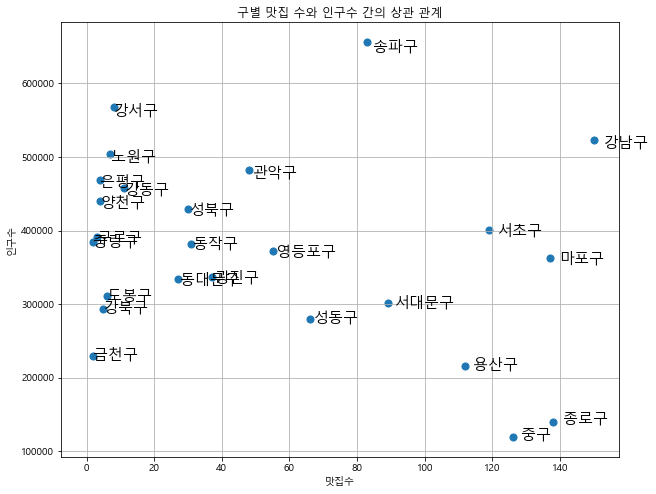

In [154]:
fp1 = np.polyfit(Fin_df['구별맛집수'], Fin_df['총 인구수'],1)
fp1

f1 = np.poly1d(fp1)
fx = np.linspace(0, 200, 1)

plt.figure(figsize=(10,8))
plt.scatter(Fin_df['구별맛집수'], Fin_df['총 인구수'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')

for n in range(25):
    plt.text(Fin_df['구별맛집수'][n]*1.02, Fin_df['총 인구수'][n]*0.98, 
             Fin_df.loc[n, '구'], fontsize=15)
    
plt.title("구별 맛집 수와 인구수 간의 상관 관계")   
plt.xlabel('맛집수')
plt.ylabel('인구수')
plt.grid()
plt.show()
